In [2]:
pip install scikit-learn

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier  # Example of an ensemble model
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load the training data
try:
    train_data = pd.read_csv('train.csv')
except FileNotFoundError:
    print("Error: Training data file not found.")
    exit()

# Verify and replace 'target_column' with the actual target column name in your dataset
target_column = 'actual_target_column_name'

# Check if the target column exists in the dataset
if target_column in train_data.columns:
    features = train_data.drop(target_column, axis=1)
    target = train_data[target_column]

    # Data Preprocessing (Handling Missing Values and Scaling)
    imputer = SimpleImputer(strategy='mean')
    features = imputer.fit_transform(features)
    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    # Split the training data into a training set and a validation set
    X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

    # Model Selection and Training
    models = {
        'Linear Regression': LinearRegression(),
        'Logistic Regression': LogisticRegression(),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
        'Naive Bayes': GaussianNB(),
        'SVM': SVC(kernel='linear', C=1.0),
        'Random Forest': RandomForestClassifier(n_estimators=100)
    }

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        if 'Regression' in model_name:
            predictions = model.predict(X_val)
            # Model evaluation for regression
            mae = mean_absolute_error(y_val, predictions)
            mse = mean_squared_error(y_val, predictions)
            r2 = r2_score(y_val, predictions)
            print(f"{model_name} - MAE: {mae}, MSE: {mse}, R-squared: {r2}")

            # Residual Plot for Linear Regression
            if 'Linear Regression' in model_name:
                plt.figure()
                plt.scatter(predictions, predictions - y_val, c='b', s=40, alpha=0.5)
                plt.hlines(y=0, xmin=0, xmax=np.max(predictions), colors='r', linewidth=3)
                plt.title('Residual Plot')
                plt.xlabel('Predicted Values')
                plt.ylabel('Residuals')

        else:
            predictions = model.predict(X_val)
            # Model evaluation for classification
            accuracy = accuracy_score(y_val, predictions)
            print(f"{model_name} - Accuracy: {accuracy}")

            if 'Random Forest' in model_name:
                # Example of ROC Curve for Random Forest
                fpr, tpr, _ = roc_curve(y_val, predictions)
                roc_auc = auc(fpr, tpr)
                plt.figure()
                plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
                plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.05])
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title(f'ROC Curve for {model_name}')
                plt.legend(loc="lower right")

    # Data Visualization and Model Evaluation (as you provided)
    # Add more visualizations and model evaluation metrics

    plt.tight_layout()
    plt.show()

    # You can now use the predictions for further analysis or evaluation
else:
    print(f"Target column '{target_column}' not found in the dataset.")

Target column 'actual_target_column_name' not found in the dataset.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier  # Example of an ensemble model
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load the training data
try:
    train_data = pd.read_csv('train.csv')
except FileNotFoundError:
    print("Error: Training data file not found.")
    exit()

# Verify and replace 'target_column' with the actual target column name in your dataset
target_column = 'actual_target_column_name'

# Check if the target column exists in the dataset
if target_column in train_data.columns:
    features = train_data.drop(target_column, axis=1)
    target = train_data[target_column]

    # Data Preprocessing (Handling Missing Values and Scaling)
    imputer = SimpleImputer(strategy='mean')
    features = imputer.fit_transform(features)
    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    # Split the training data into a training set and a validation set
    X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

    # Model Selection and Training
    models = {
        'Linear Regression': LinearRegression(),
        'Logistic Regression': LogisticRegression(),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
        'Naive Bayes': GaussianNB(),
        'SVM': SVC(kernel='linear', C=1.0),
        'Random Forest': RandomForestClassifier(n_estimators=100)
    }

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        if 'Regression' in model_name:
            predictions = model.predict(X_val)
            # Model evaluation for regression
            mae = mean_absolute_error(y_val, predictions)
            mse = mean_squared_error(y_val, predictions)
            r2 = r2_score(y_val, predictions)
            print(f"{model_name} - MAE: {mae}, MSE: {mse}, R-squared: {r2}")

            # Residual Plot for Linear Regression
            if 'Linear Regression' in model_name:
                plt.figure()
                plt.scatter(predictions, predictions - y_val, c='b', s=40, alpha=0.5)
                plt.hlines(y=0, xmin=0, xmax=np.max(predictions), colors='r', linewidth=3)
                plt.title('Residual Plot')
                plt.xlabel('Predicted Values')
                plt.ylabel('Residuals')

        else:
            predictions = model.predict(X_val)
            # Model evaluation for classification
            accuracy = accuracy_score(y_val, predictions)
            print(f"{model_name} - Accuracy: {accuracy}")

            if 'Random Forest' in model_name:
                # Example of ROC Curve for Random Forest
                fpr, tpr, _ = roc_curve(y_val, predictions)
                roc_auc = auc(fpr, tpr)
                plt.figure()
                plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
                plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.05])
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title(f'ROC Curve for {model_name}')
                plt.legend(loc="lower right")

    # Data Visualization and Model Evaluation (as you provided)
    # Add more visualizations and model evaluation metrics

    plt.tight_layout()
    plt.show()

    # You can now use the predictions for further analysis or evaluation
else:
    print(f"Target column '{target_column}' not found in the dataset.")

Target column 'actual_target_column_name' not found in the dataset.


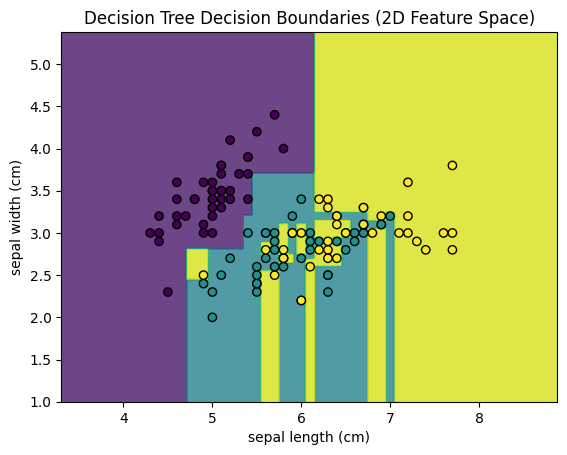

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

# Load the Iris dataset as an example
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train[:, :2], y_train)  # Use only the first 2 features for 2D visualization
y_pred = dtc.predict(X_test[:, :2])  # Use only the first 2 features for prediction

# Scatter Plot for 2D Feature Space (2 features)
feature1 = 0  # Index of the first feature
feature2 = 1  # Index of the second feature
X_2D = X[:, [feature1, feature2]]
X_train_2D = X_train[:, [feature1, feature2]]

h = .02  # Step size in the mesh
x_min, x_max = X_2D[:, 0].min() - 1, X_2D[:, 0].max() + 1
y_min, y_max = X_2D[:, 1].min() - 1, X_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = dtc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, edgecolors='k')
plt.title('Decision Tree Decision Boundaries (2D Feature Space)')
plt.xlabel(data.feature_names[feature1])
plt.ylabel(data.feature_names[feature2])
plt.show()


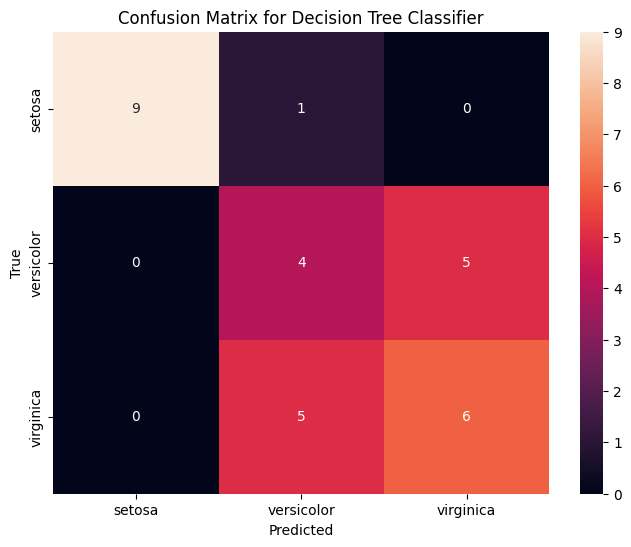

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Load the Iris dataset as an example
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train[:, :2], y_train)  # Use only the first 2 features for 2D visualization
y_pred = dtc.predict(X_test[:, :2])  # Use only the first 2 features for prediction

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


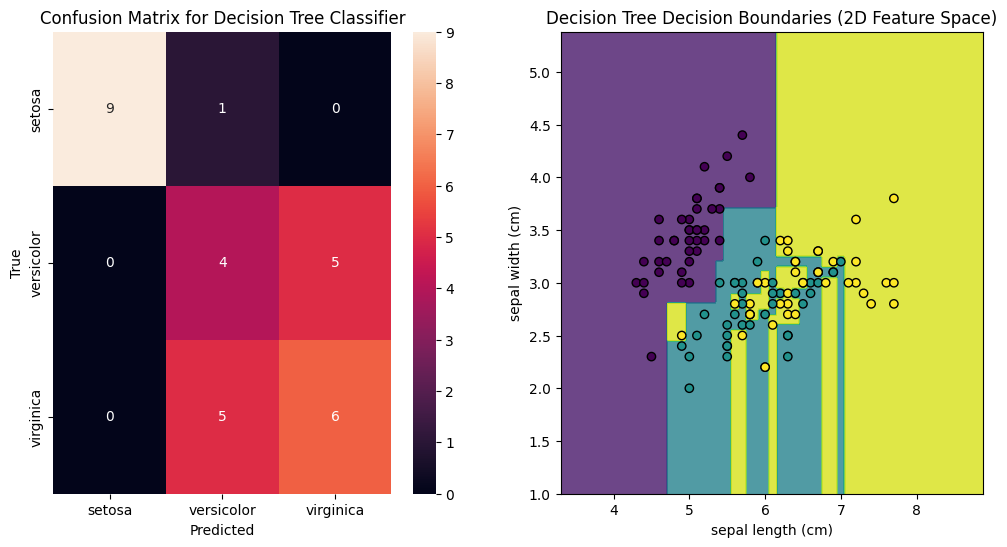

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Load the Iris dataset as an example
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train[:, :2], y_train)  # Use only the first 2 features for 2D visualization
y_pred = dtc.predict(X_test[:, :2])  # Use only the first 2 features for prediction

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree Classifier')

# Scatter Plot for 2D Feature Space with Decision Boundaries
plt.subplot(1, 2, 2)
feature1 = 0  # Index of the first feature
feature2 = 1  # Index of the second feature
X_2D = X[:, [feature1, feature2]]
X_train_2D = X_train[:, [feature1, feature2]]

h = .02  # Step size in the mesh
x_min, x_max = X_2D[:, 0].min() - 1, X_2D[:, 0].max() + 1
y_min, y_max = X_2D[:, 1].min() - 1, X_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = dtc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, edgecolors='k')
plt.title('Decision Tree Decision Boundaries (2D Feature Space)')
plt.xlabel(data.feature_names[feature1])
plt.ylabel(data.feature_names[feature2])

plt.show()


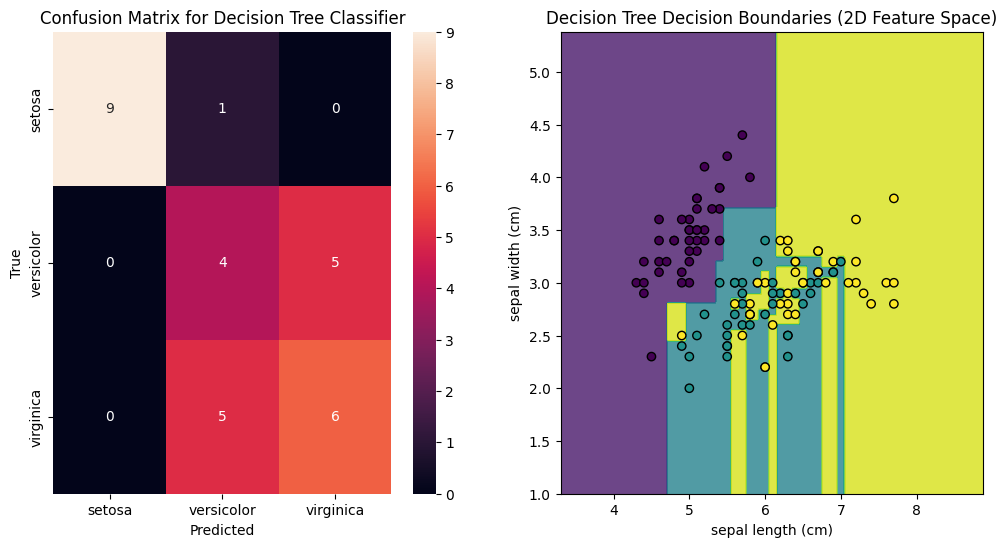

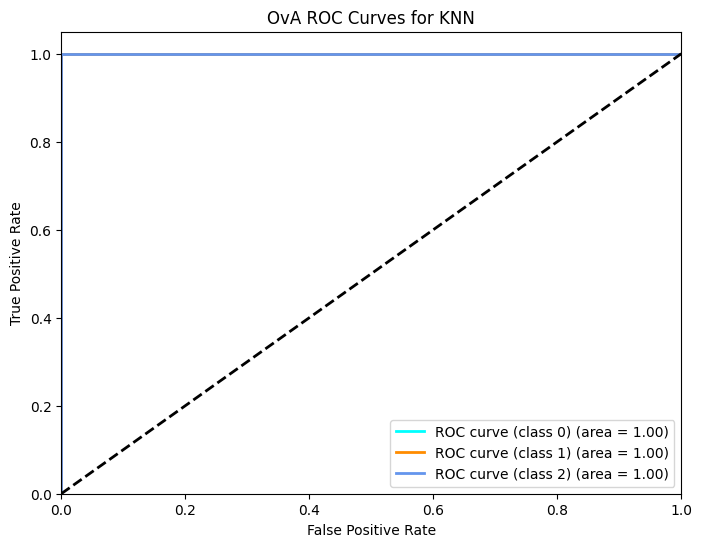

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import numpy as np

# Load the Iris dataset as an example
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train[:, :2], y_train)  # Use only the first 2 features for 2D visualization
y_pred = dtc.predict(X_test[:, :2])  # Use only the first 2 features for prediction

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree Classifier')

# Scatter Plot for 2D Feature Space with Decision Boundaries
plt.subplot(1, 2, 2)
feature1 = 0  # Index of the first feature
feature2 = 1  # Index of the second feature
X_2D = X[:, [feature1, feature2]]
X_train_2D = X_train[:, [feature1, feature2]]

h = .02  # Step size in the mesh
x_min, x_max = X_2D[:, 0].min() - 1, X_2D[:, 0].max() + 1
y_min, y_max = X_2D[:, 1].min() - 1, X_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = dtc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, edgecolors='k')
plt.title('Decision Tree Decision Boundaries (2D Feature Space)')
plt.xlabel(data.feature_names[feature1])
plt.ylabel(data.feature_names[feature2])

# OvA ROC Curves for KNN
n_classes = len(data.target_names)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_bin = (y_test == i).astype(int)
    y_score = knn.predict_proba(X_test)[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('OvA ROC Curves for KNN')
plt.legend(loc="lower right")

plt.show()
